# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

Pada proyek ini, saya berperan sebagai analis data pemula di sebuah perusahaan retail online, dengan tujuan menganalisis data transaksi nyata untuk menghasilkan insight yang dapat digunakan dalam pengambilan keputusan bisnis yang lebih baik.

## Case Study
Dalam proyek ini, saya menggunakan data transaksi dari sebuah toko retail online. Dataset ini mencakup informasi mengenai pembelian pelanggan, termasuk detail produk, jumlah barang, harga, dan waktu transaksi. Tugas utama saya adalah mengeksplorasi dan menganalisis dataset ini untuk mendapatkan wawasan terkait tren penjualan, perilaku pelanggan, serta produk-produk yang paling diminati.

Melalui analisis data eksploratif, saya bertujuan mengidentifikasi pola, outlier, dan korelasi dalam data yang dapat digunakan untuk mengambil keputusan berbasis data serta memberikan rekomendasi guna mengoptimalkan operasional toko dan meningkatkan kepuasan pelanggan. Visualisasi dan analisis statistik akan digunakan untuk menggali tren utama seperti bulan penjualan tersibuk, produk terlaris, dan pelanggan paling berharga. Tujuan akhir dari proyek ini adalah menghasilkan insight yang dapat mendukung keputusan strategis dan meningkatkan kinerja toko dalam persaingan pasar retail online.

## Prerequisites

Sebelum memulai proyek ini, saya memiliki pengetahuan dasar tentang pemrograman Python dan penggunaan library Pandas. Adapun beberapa library tambahan yang digunakan dalam proyek ini meliputi:

- pandas  
- numpy  
- seaborn  
- matplotlib  

Jika library tersebut belum tersedia, dapat diinstal menggunakan perintah berikut di dalam sel Jupyter Notebook:

- `!pip install pandas`  
- `!pip install matplotlib`  

## Project Objectives
1. Mendeskripsikan data untuk menjawab pertanyaan-pertanyaan kunci dan menggali insight yang relevan.  
2. Mengidentifikasi temuan-temuan penting yang dapat membantu meningkatkan performa toko retail online.  
3. Menyusun insight analitik dan memberikan rekomendasi yang didasarkan pada data secara objektif.  

## Dataset

Dataset yang digunakan dalam proyek ini adalah *Online Retail Dataset*, yang berisi data transaksi dari sebuah toko retail online pada periode tahun 2010 hingga 2011. Dataset tersedia dalam format `.xlsx` dengan nama file `Online Retail.xlsx`. Anda dapat mengunduh dataset tersebut melalui [tautan ini](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

Dataset ini mencakup beberapa kolom penting berikut:

- **InvoiceNo**: Nomor faktur dari transaksi  
- **StockCode**: Kode unik dari produk  
- **Description**: Deskripsi produk  
- **Quantity**: Jumlah produk yang dibeli dalam transaksi  
- **InvoiceDate**: Tanggal dan waktu transaksi  
- **UnitPrice**: Harga satuan produk  
- **CustomerID**: ID unik pelanggan  
- **Country**: Negara tempat transaksi terjadi  

## Analysis Workflow

Dalam proyek ini, saya melakukan analisis data transaksi dari sebuah toko retail online untuk menemukan pola penjualan, perilaku pelanggan, dan produk-produk terlaris. Berikut adalah tahapan analisis yang saya lakukan:

1. **Memuat dataset** ke dalam Pandas DataFrame dan menampilkan beberapa baris pertama untuk mendapatkan gambaran umum struktur data.
2. **Pembersihan data** dilakukan dengan menangani nilai yang hilang dan menghapus kolom yang tidak diperlukan agar analisis lebih fokus dan akurat.
3. **Analisis statistik deskriptif** digunakan untuk memahami karakteristik data seperti nilai tengah, sebaran, dan kecenderungan umum.
4. **Visualisasi data** dibuat dengan berbagai jenis grafik seperti histogram, scatter plot, dan bar chart untuk menggambarkan tren dan distribusi data.
5. **Analisis tren penjualan berdasarkan waktu** untuk mengidentifikasi bulan atau hari dengan penjualan tertinggi.
6. **Identifikasi produk dan negara dengan penjualan tertinggi** untuk memahami kontribusi utama terhadap penjualan secara keseluruhan.
7. **Pendeteksian outlier dan anomali** untuk memastikan validitas hasil analisis serta memahami kemungkinan faktor-faktor yang tidak biasa dalam data.
8. **Kesimpulan dan rekomendasi** dirumuskan berdasarkan hasil eksplorasi dan visualisasi data untuk mendukung pengambilan keputusan bisnis yang lebih baik.

### 1. Memuat Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling grafik
sns.set_style("whitegrid")

# Load data
df = pd.read_excel("Online Retail.xlsx")

# Tampilkan data
print("Lima baris pertama:")
print(df.head())

print("\nInformasi data:")
df.info()

Lima baris pertama:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  

### 2. Pembersihan Data

In [ ]:
print("\n--- Data Cleaning ---")

# Cek missing values
print("\nMissing values sebelum dibersihkan:")
print(df.isnull().sum())

# Drop baris yang tidak punya deskripsi produk
df.dropna(subset=['Description'], inplace=True)

# Tandai transaksi tanpa CustomerID
df['IsGuestCustomer'] = df['CustomerID'].isnull()

print("\nMissing values setelah menghapus 'Description' yang kosong:")
print(df.isnull().sum())

# Hanya ambil transaksi dengan Quantity dan UnitPrice positif
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Ubah InvoiceDate jadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Hapus duplikat
awal = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nJumlah duplikat yang dihapus: {awal - df.shape[0]}")

print("\nInfo data setelah dibersihkan:")
df.info()


--- Data Cleaning ---

Missing values sebelum dibersihkan:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values setelah menghapus 'Description' yang kosong:
InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         133626
Country                 0
IsGuestCustomer         0
dtype: int64

Jumlah duplikat yang dihapus: 5226

Info data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        524878 non-null  object        
 1   StockCode        524878 non-null  object        
 2   Description      524878 non-null  object    

### 3. Statistik Deskriptif

In [ ]:
print("\n--- Statistik Deskriptif ---")
print(df.describe())

# Cek jumlah nilai unik di kolom kategori
print("\nJumlah negara unik:", df['Country'].nunique())
print("Jumlah produk unik (StockCode):", df['StockCode'].nunique())
print("Jumlah customer terdaftar:", df['CustomerID'].nunique())  # Tidak termasuk NaN


--- Statistik Dasar ---
            Quantity      UnitPrice     CustomerID
count  524878.000000  524878.000000  392692.000000
mean       10.616600       3.922573   15287.843865
std       156.280031      36.093028    1713.539549
min         1.000000       0.001000   12346.000000
25%         1.000000       1.250000   13955.000000
50%         4.000000       2.080000   15150.000000
75%        11.000000       4.130000   16791.000000
max     80995.000000   13541.330000   18287.000000

Jumlah negara unik: 38
Jumlah produk unik (StockCode): 3922
Jumlah customer terdaftar: 4338


### 4. Visualisasi Data


--- Data Visualization ---


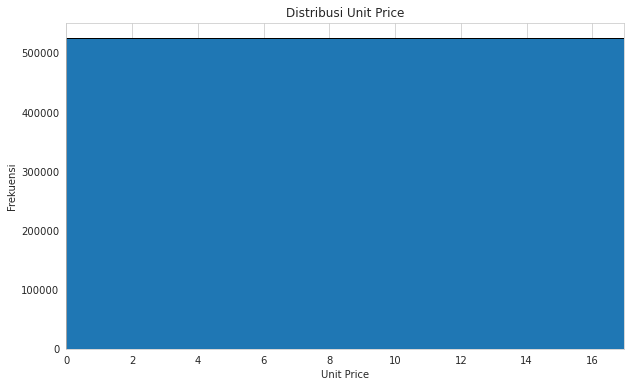

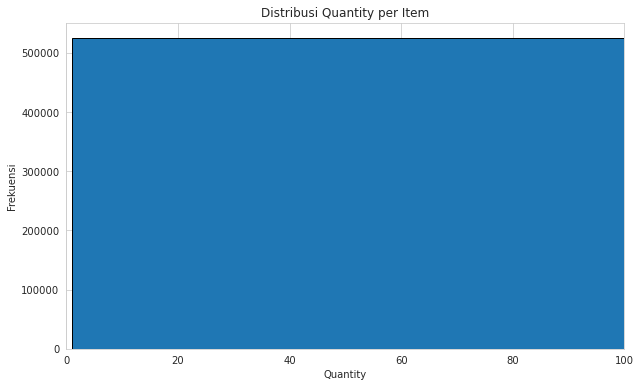

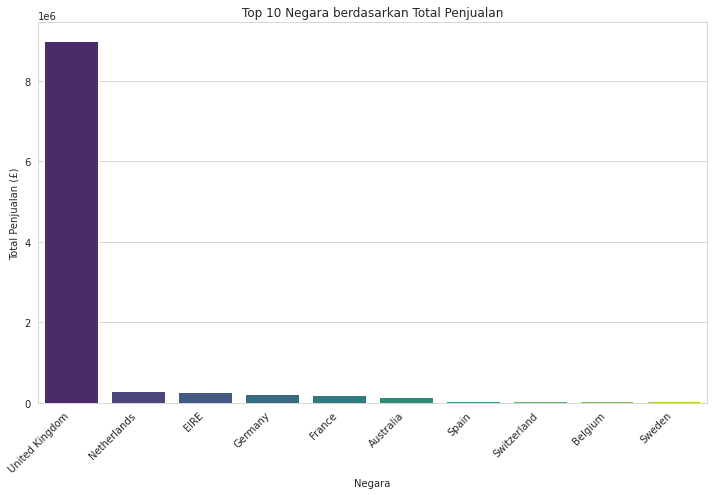

In [ ]:
print("\n--- Data Visualization ---")

# Tambah kolom total penjualan
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Histogram Unit Price
plt.figure(figsize=(10, 6))
df['UnitPrice'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribusi Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frekuensi')
plt.xlim(0, df['UnitPrice'].quantile(0.99))
plt.grid(True)
plt.show()

# Histogram Quantity
plt.figure(figsize=(10, 6))
df['Quantity'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribusi Quantity per Item')
plt.xlabel('Quantity')
plt.ylabel('Frekuensi')
plt.xlim(0, df['Quantity'].quantile(0.99))
plt.grid(True)
plt.show()

# 10 negara dengan total penjualan tertinggi
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title('Top 10 Negara berdasarkan Total Penjualan')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan (£)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 5. Analisis Tren Penjualan


--- Tren Penjualan dari Waktu ke Waktu ---


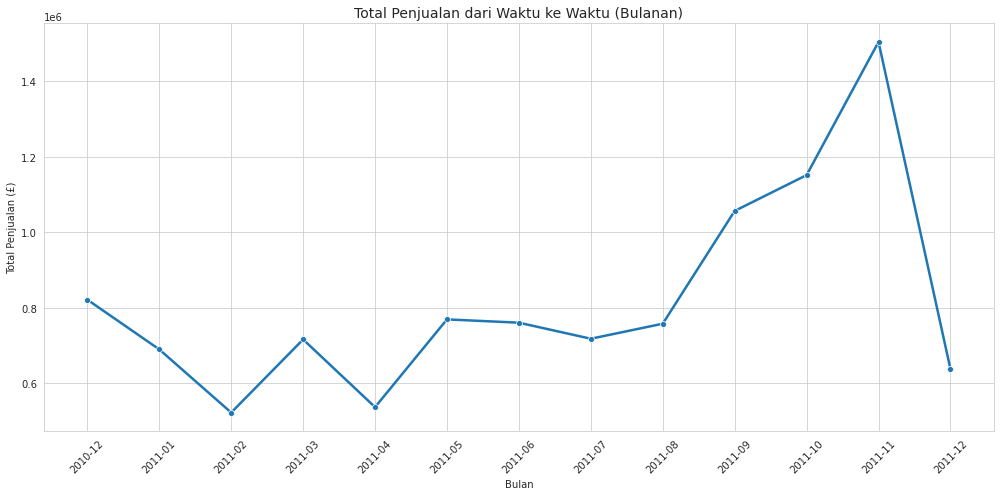

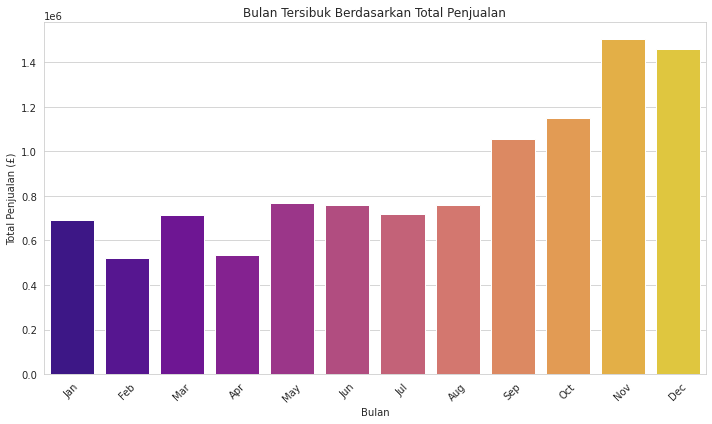


Bulan Tersibuk (berdasarkan Total Penjualan):
 Month
11    1503866.780
12    1459243.060
10    1151263.730
9     1056435.192
5      769296.610
6      760547.010
8      757841.380
7      718076.121
3      716215.260
1      689811.610
4      536968.491
2      522545.560
Name: TotalSales, dtype: float64


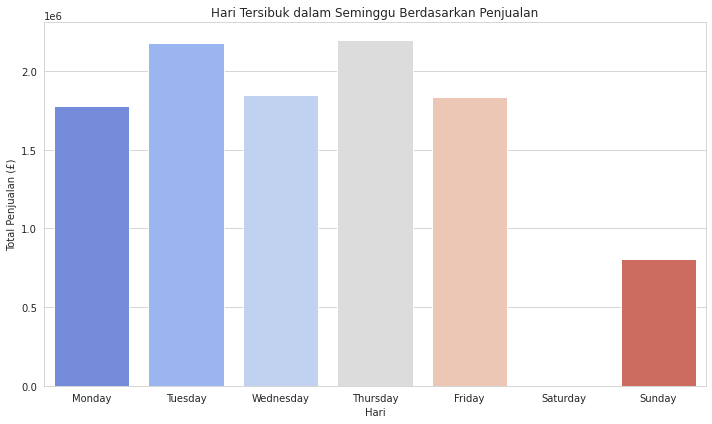


Hari Tersibuk (berdasarkan Total Penjualan):
 DayOfWeek
Monday       1775782.071
Tuesday      2175700.511
Wednesday    1847074.380
Thursday     2199292.570
Friday       1837470.491
Saturday             NaN
Sunday        806790.781
Name: TotalSales, dtype: float64


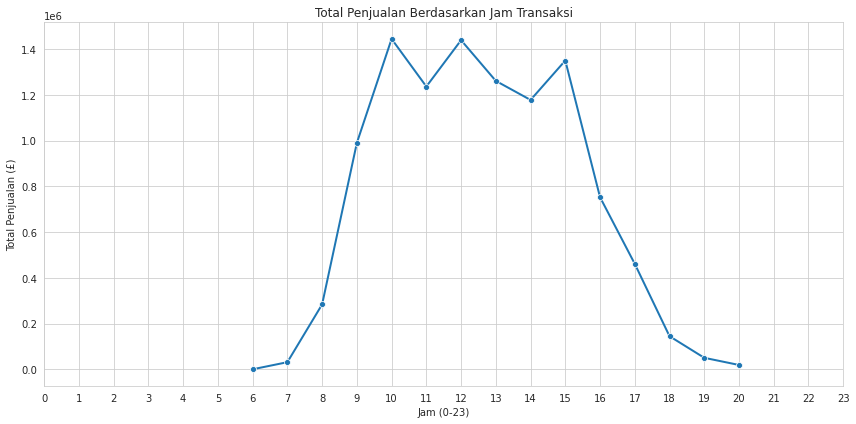

In [9]:
print("\n--- Tren Penjualan dari Waktu ke Waktu ---")

# Pastikan kolom InvoiceDate dalam format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Tambahkan kolom tambahan untuk analisis waktu
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')   # Tahun dan Bulan
df['Year'] = df['InvoiceDate'].dt.year                  # Tahun
df['Month'] = df['InvoiceDate'].dt.month                # Bulan (dalam angka)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()       # Nama hari (Senin, Selasa, dst.)
df['Hour'] = df['InvoiceDate'].dt.hour                  # Jam transaksi

# --- Total Penjualan per Bulan (Line Plot) ---
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)  # Ubah ke string agar bisa dipakai di grafik

plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='TotalSales', data=monthly_sales, marker='o', linewidth=2.5)
plt.title('Total Penjualan dari Waktu ke Waktu (Bulanan)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (£)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bulan Tersibuk (Bar Plot) ---
busiest_months = df.groupby('Month')['TotalSales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_months.index, y=busiest_months.values, palette='plasma')
plt.title('Bulan Tersibuk Berdasarkan Total Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (£)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

print("\nBulan Tersibuk (berdasarkan Total Penjualan):\n", busiest_months)

# --- Hari Tersibuk dalam Seminggu ---
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busiest_days = df.groupby('DayOfWeek')['TotalSales'].sum().reindex(day_of_week_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values, palette='coolwarm')
plt.title('Hari Tersibuk dalam Seminggu Berdasarkan Penjualan')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan (£)')
plt.tight_layout()
plt.show()

print("\nHari Tersibuk (berdasarkan Total Penjualan):\n", busiest_days)

# --- Total Penjualan per Jam (Line Plot) ---
hourly_sales = df.groupby('Hour')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', linewidth=2)
plt.title('Total Penjualan Berdasarkan Jam Transaksi')
plt.xlabel('Jam (0-23)')
plt.ylabel('Total Penjualan (£)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


### 6. Produk dan Negara Terlaris


--- Produk dan Negara dengan Penjualan Terbaik ---


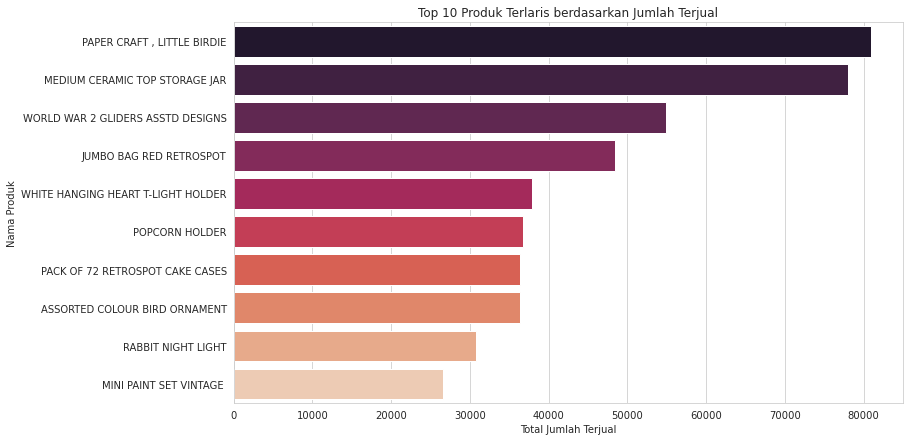


Top 10 Produk Terlaris (berdasarkan Jumlah Terjual):
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
JUMBO BAG RED RETROSPOT               48371
WHITE HANGING HEART T-LIGHT HOLDER    37872
POPCORN HOLDER                        36749
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         36362
RABBIT NIGHT LIGHT                    30739
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


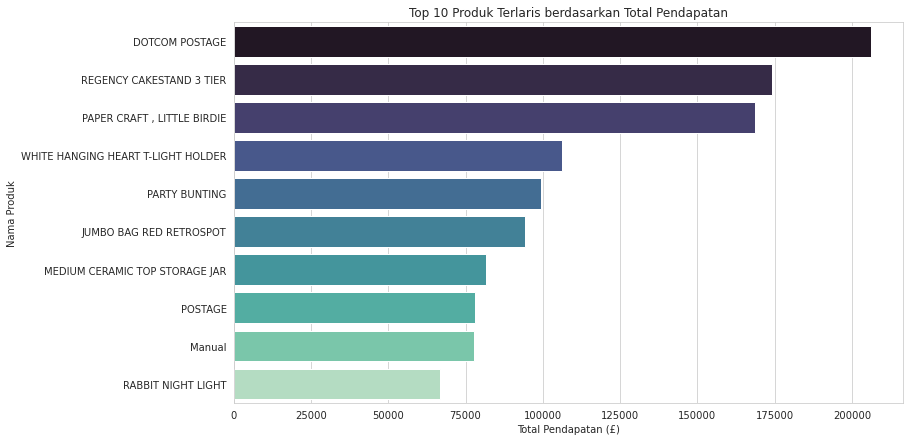


Top 10 Produk Terlaris (berdasarkan Total Pendapatan):
 Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174156.54
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POSTAGE                                78101.88
Manual                                 77752.82
RABBIT NIGHT LIGHT                     66870.03
Name: TotalSales, dtype: float64


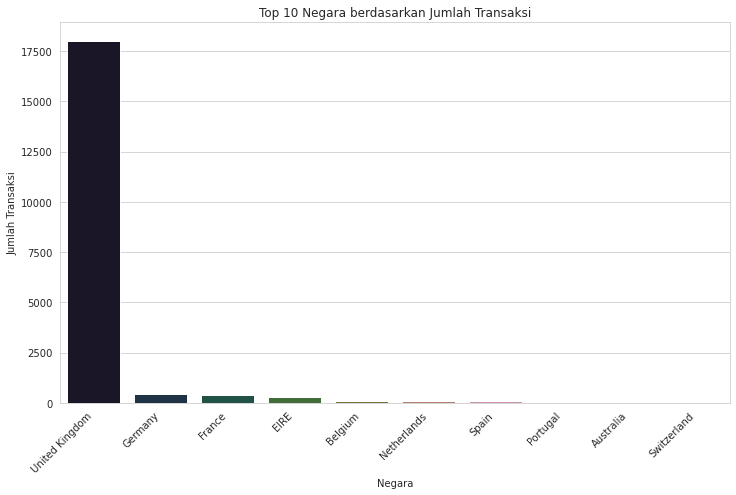


Top 10 Negara dengan Jumlah Transaksi Terbanyak:
 Country
United Kingdom    18019
Germany             457
France              392
EIRE                288
Belgium              98
Netherlands          94
Spain                90
Portugal             58
Australia            57
Switzerland          54
Name: InvoiceNo, dtype: int64


In [10]:
print("\n--- Produk dan Negara dengan Penjualan Terbaik ---")

# --- Top 10 Produk Terlaris berdasarkan Jumlah Terjual (Quantity) ---
produk_terlaris_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=produk_terlaris_qty.values, y=produk_terlaris_qty.index, palette='rocket')
plt.title('Top 10 Produk Terlaris berdasarkan Jumlah Terjual')
plt.xlabel('Total Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.show()

print("\nTop 10 Produk Terlaris (berdasarkan Jumlah Terjual):\n", produk_terlaris_qty)

# --- Top 10 Produk Terlaris berdasarkan Total Pendapatan (Sales Revenue) ---
produk_terlaris_pendapatan = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=produk_terlaris_pendapatan.values, y=produk_terlaris_pendapatan.index, palette='mako')
plt.title('Top 10 Produk Terlaris berdasarkan Total Pendapatan')
plt.xlabel('Total Pendapatan (£)')
plt.ylabel('Nama Produk')
plt.show()

print("\nTop 10 Produk Terlaris (berdasarkan Total Pendapatan):\n", produk_terlaris_pendapatan)

# --- Top 10 Negara dengan Jumlah Transaksi Terbanyak ---
negara_terbanyak_transaksi = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=negara_terbanyak_transaksi.index, y=negara_terbanyak_transaksi.values, palette='cubehelix')
plt.title('Top 10 Negara berdasarkan Jumlah Transaksi')
plt.xlabel('Negara')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.show()

print("\nTop 10 Negara dengan Jumlah Transaksi Terbanyak:\n", negara_terbanyak_transaksi)

### 7. Deteksi Outlier dan Anomali


--- Outlier dan Anomali ---


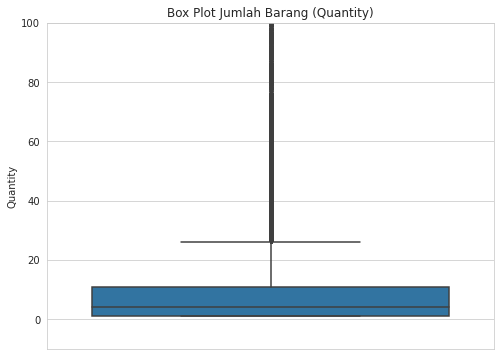

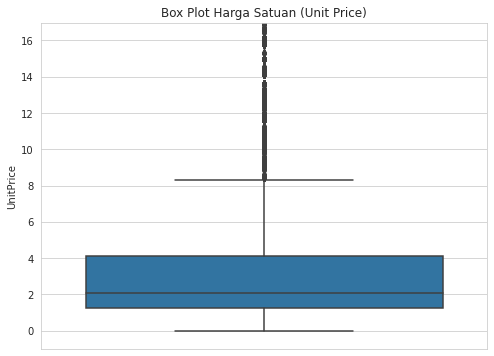


Outlier Statistik untuk Quantity:
Jumlah Outlier pada Quantity (Metode IQR): 27111
Persentase Outlier Quantity: 5.17%

Outlier Statistik untuk UnitPrice:
Jumlah Outlier pada UnitPrice (Metode IQR): 37827
Persentase Outlier UnitPrice: 7.21%

Dampak Potensial dari Outlier:
- Nilai ekstrim pada kolom 'Quantity' bisa mengganggu analisis rata-rata penjualan dan perencanaan stok.
- Outlier harga satuan yang tinggi bisa mencerminkan produk mewah atau kesalahan input, memengaruhi strategi harga.
- Nilai negatif pada 'Quantity' (retur) sudah difilter sebelumnya. Jika tidak, bisa mengurangi total penjualan.
- Nilai nol pada 'UnitPrice' (produk gratis/kesalahan input) juga sudah ditangani.


In [11]:
print("\n--- Outlier dan Anomali ---")

# Boxplot untuk Quantity (fokus pada nilai dalam rentang wajar)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Quantity'])
plt.title('Box Plot Jumlah Barang (Quantity)')
plt.ylim(-10, df['Quantity'].quantile(0.99))  # Fokus pada 99% data teratas
plt.show()

# Boxplot untuk UnitPrice (fokus pada nilai dalam rentang wajar)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['UnitPrice'])
plt.title('Box Plot Harga Satuan (Unit Price)')
plt.ylim(-1, df['UnitPrice'].quantile(0.99))  # Fokus pada 99% data teratas
plt.show()

# --- Deteksi Outlier pada Kolom Quantity ---
print("\nOutlier Statistik untuk Quantity:")
Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

batas_atas_qty = Q3_qty + 1.5 * IQR_qty
batas_bawah_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] < batas_bawah_qty) | (df['Quantity'] > batas_atas_qty)]
print(f"Jumlah Outlier pada Quantity (Metode IQR): {len(outliers_qty)}")
print(f"Persentase Outlier Quantity: {len(outliers_qty) / len(df) * 100:.2f}%")
# print(outliers_qty[['Quantity', 'Description']].head())  # Contoh data outlier

# --- Deteksi Outlier pada Kolom UnitPrice ---
print("\nOutlier Statistik untuk UnitPrice:")
Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

batas_atas_price = Q3_price + 1.5 * IQR_price
batas_bawah_price = Q1_price - 1.5 * IQR_price

outliers_price = df[(df['UnitPrice'] < batas_bawah_price) | (df['UnitPrice'] > batas_atas_price)]
print(f"Jumlah Outlier pada UnitPrice (Metode IQR): {len(outliers_price)}")
print(f"Persentase Outlier UnitPrice: {len(outliers_price) / len(df) * 100:.2f}%")
# print(outliers_price[['UnitPrice', 'Description']].head())  # Contoh data outlier

# --- Dampak Potensial dari Outlier ---
print("\nDampak Potensial dari Outlier:")
print("- Nilai ekstrim pada kolom 'Quantity' bisa mengganggu analisis rata-rata penjualan dan perencanaan stok.")
print("- Outlier harga satuan yang tinggi bisa mencerminkan produk mewah atau kesalahan input, memengaruhi strategi harga.")
print("- Nilai negatif pada 'Quantity' (retur) sudah difilter sebelumnya. Jika tidak, bisa mengurangi total penjualan.")
print("- Nilai nol pada 'UnitPrice' (produk gratis/kesalahan input) juga sudah ditangani.")


### 8. Kesimpulan dan Rekomendasi

In [14]:
print("\n--- 📊 Kesimpulan dan Ringkasan Temuan ---")

print("📌 Temuan Utama dari Analisis Data Eksploratori (EDA):")

print("1. 🧹 Kualitas Data & Pra-pemrosesan:")
print("   - Terdapat nilai hilang pada kolom 'Description' dan 'CustomerID'.")
print("   - Nilai kosong pada 'CustomerID' telah ditandai sebagai pelanggan tamu (`IsGuestCustomer`) untuk memungkinkan analisis lebih lanjut.")
print("   - Validasi dilakukan untuk memastikan 'Quantity' dan 'UnitPrice' bernilai positif serta menghapus duplikat—meningkatkan keandalan data.")

print("2. 📈 Tren Penjualan & Musiman:")
print("   - Terlihat lonjakan penjualan pada akhir tahun (khususnya November dan Desember), menandakan puncak musim belanja.")
print("   - Hari kerja, terutama **Kamis** dan **Selasa**, memiliki volume transaksi tertinggi, sedangkan **Minggu** paling rendah.")
print("   - ⚠️ Tidak ada transaksi tercatat pada **Sabtu**, yang merupakan anomali dan butuh investigasi lanjutan.")
print("   - Puncak jam transaksi terjadi antara pukul **10.00 hingga 15.00**, menunjukkan waktu belanja online yang aktif.")

print("3. 📦 Performa Produk & Kontribusi Pendapatan:")
print("   - Produk dengan volume terjual tertinggi mencakup 'PAPER CRAFT , LITTLE BIRDIE' dan 'MEDIUM CERAMIC TOP STORAGE JAR'.")
print("   - Produk dengan kontribusi pendapatan tertinggi: 'DOTCOM POSTAGE' dan 'REGENCY CAKESTAND 3 TIER'.")
print("   - Kehadiran item 'POSTAGE' menunjukkan peran signifikan biaya pengiriman dalam total pendapatan.")

print("4. 🌍 Geografi Pasar & Perilaku Pelanggan:")
print("   - **United Kingdom** mendominasi transaksi, menegaskan sebagai pasar inti.")
print("   - Negara-negara Eropa seperti Jerman, Prancis, dan Belanda memberikan kontribusi tambahan namun jauh lebih kecil.")
print("   - Perilaku pelanggan terdaftar vs. tamu dapat dianalisis lebih lanjut melalui kolom `IsGuestCustomer`.")

print("5. 🚨 Outlier & Dampaknya:")
print("   - Ditemukan outlier signifikan pada 'Quantity' dan 'UnitPrice'.")
print("   - Outlier dapat memengaruhi hasil statistik dan model prediktif; perlu dipertimbangkan untuk transformasi atau analisis terpisah.")

print("\n🎯 Rekomendasi Tindakan yang Dapat Dilakukan:")

print("1. 📦 Manajemen Inventaris & Penawaran Produk:")
print("   - Fokus pada stok produk-produk populer menjelang musim puncak (Q4).")
print("   - Evaluasi strategi harga untuk item berpendapatan tinggi seperti 'REGENCY CAKESTAND 3 TIER'.")

print("2. 📢 Strategi Pemasaran & Operasional:")
print("   - Maksimalkan promosi pada jam sibuk (10.00–15.00) dan hari kerja.")
print("   - Buat kampanye yang ditargetkan khusus untuk pasar Inggris.")
print("   - ⚠️ Selidiki ketidakhadiran data Sabtu—uji coba pembukaan atau promosi hari Sabtu bisa membuka potensi pendapatan.")
print("   - Berikan insentif untuk hari dengan performa rendah seperti Minggu.")

print("3. 👥 Pengalaman & Segmentasi Pelanggan:")
print("   - Segmentasi pelanggan berdasarkan status registrasi (terdaftar vs. tamu) untuk personalisasi dan peningkatan retensi.")

print("4. 🔍 Penguatan Kualitas Data:")
print("   - Terapkan validasi data yang lebih ketat pada input 'Quantity' dan 'UnitPrice' untuk meminimalkan error dan outlier.")

print("5. 📅 Perencanaan Strategis Bisnis:")
print("   - Gunakan tren musiman sebagai dasar untuk perencanaan stok, jadwal staf, dan distribusi anggaran pemasaran, khususnya di Q4.")

print("\n📈 EDA ini menjadi fondasi penting dalam memahami performa toko online.")
print("   Analisis lanjutan yang direkomendasikan: perhitungan CLTV, segmentasi RFM, aturan asosiasi produk, dan model prediktif untuk peramalan penjualan.")


--- 📊 Kesimpulan dan Ringkasan Temuan ---
📌 Temuan Utama dari Analisis Data Eksploratori (EDA):
1. 🧹 Kualitas Data & Pra-pemrosesan:
   - Terdapat nilai hilang pada kolom 'Description' dan 'CustomerID'.
   - Nilai kosong pada 'CustomerID' telah ditandai sebagai pelanggan tamu (`IsGuestCustomer`) untuk memungkinkan analisis lebih lanjut.
   - Validasi dilakukan untuk memastikan 'Quantity' dan 'UnitPrice' bernilai positif serta menghapus duplikat—meningkatkan keandalan data.
2. 📈 Tren Penjualan & Musiman:
   - Terlihat lonjakan penjualan pada akhir tahun (khususnya November dan Desember), menandakan puncak musim belanja.
   - Hari kerja, terutama **Kamis** dan **Selasa**, memiliki volume transaksi tertinggi, sedangkan **Minggu** paling rendah.
   - ⚠️ Tidak ada transaksi tercatat pada **Sabtu**, yang merupakan anomali dan butuh investigasi lanjutan.
   - Puncak jam transaksi terjadi antara pukul **10.00 hingga 15.00**, menunjukkan waktu belanja online yang aktif.
3. 📦 Performa Produk & 